<a href="https://colab.research.google.com/github/inti24/Data-110/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

# introduction to the dataset and why I chose it.

I chose the Global Corruption Data set because of current poltical affairs I was curious as to where certain countires stand before what seems like countires all around the world start to change. This particular data set is the Corruption Persception Index or (CPI) for short. "The CPI ranks 180 countries and territories worldwide by their perceived levels of public sector corruption. The results are given on a scale of 0 (highly corrupt) to 100 (very clean)." - [Transparency International](https://www.transparency.org/en/cpi/2024/index/usa)

In [67]:
df=pd.read_csv('https://raw.githubusercontent.com/inti24/Data-110/refs/heads/main/Project_1/GlobalCorruption1.csv')
df.head()

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,Denmark,DNK,WE/EU,88,1,8,1.78,87,1,8,...,2.16,92.0,7.0,2.04,91.0,7.0,2.2,90.0,7.0,2.0
1,New Zealand,NZL,AP,88,1,8,1.48,87,1,8,...,2.32,91.0,7.0,2.28,91.0,7.0,2.3,90.0,7.0,2.2
2,Finland,FIN,WE/EU,85,3,8,1.75,86,3,8,...,1.77,89.0,7.0,2.05,89.0,7.0,1.7,90.0,7.0,3.0
3,Singapore,SGP,AP,85,3,9,1.20,85,4,9,...,2.02,84.0,8.0,1.75,86.0,9.0,2.3,87.0,9.0,2.1
4,Sweden,SWE,WE/EU,85,3,8,1.30,85,4,8,...,1.71,87.0,7.0,3.41,89.0,7.0,2.3,88.0,7.0,1.9


# A summary of your EDA process and key observations.
For future purposes these are the make up of the regions
- AME = Americas
- AP = Asia Pacific
- SSA = Sub Saharan Africa
- WE/EU= Western Europe/ European Union
- ECA = Europe and Central Asia
- MENA = Middle East and North Africa

Comparing CPI scores from 2012 to 2020
We can see that the AP region has a wide range more than the other regions. The question is why is that?
Looking further into the data sets we can see that the reson may be due to some data points being not present, as well as overall some countries increased their CPI score.

The next point of interest would be the SSA region where there seems to be a lot of outliers. Looking further into this we can see that countries overall improved their CPI scores an very clear example would be Somalia. In 2012 Somalia was below a CPI score of 10 and in 2020 Somalia raised its score above a 10, also to note there is a country that did not have a data in 2012 that being South Sudan.

In [68]:
#sort by regions
re = df.sort_values(by='Region')
re.head()

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
89,Trinidad and Tobago,TTO,AME,40,86,7,3.73,40,85,7,...,4.64,38.0,4.0,4.82,38.0,4.0,5.1,39.0,4.0,4.5
91,Colombia,COL,AME,39,92,8,1.59,37,96,8,...,1.94,37.0,7.0,1.68,36.0,7.0,2.0,36.0,7.0,2.6
149,Guatemala,GTM,AME,25,149,7,1.38,26,146,7,...,3.46,32.0,6.0,2.96,29.0,6.0,2.6,33.0,6.0,2.7
24,Chile,CHL,AME,67,25,9,1.23,67,26,9,...,2.15,73.0,8.0,1.74,71.0,9.0,1.8,72.0,9.0,2.1
25,United States of America,USA,AME,67,25,9,2.49,69,23,9,...,3.47,74.0,8.0,3.74,73.0,9.0,4.0,73.0,9.0,4.1


Text(0, 0.5, 'CPI Score 2020')

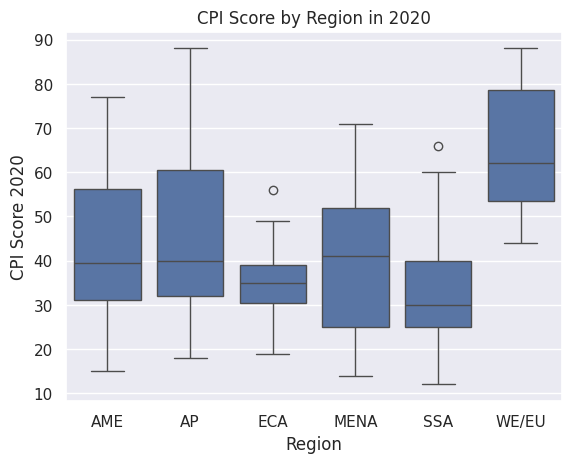

In [69]:
#Creating a boxplot to comapre and contrast the different regions of the world and the CPI scores
#I will do the most earliest year that the data has, that being 2020 and the oldest year that data has, that being 2012 to see any trends within the regions.

sns.set_theme(style="darkgrid")
sns.boxplot(x='Region', y='CPI score 2020', data=re)

plt.title('CPI Score by Region in 2020')
plt.xlabel('Region')
plt.ylabel('CPI Score 2020')


Text(0, 0.5, 'CPI Score 2012')

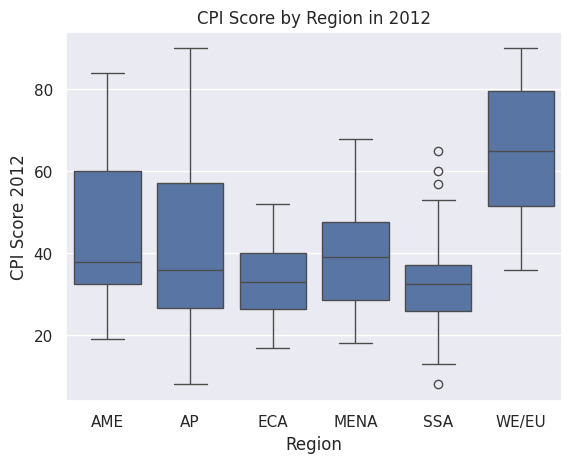

In [70]:
sns.set_theme(style="darkgrid")
sns.boxplot(x='Region', y='CPI Score 2012', data=re)
plt.title('CPI Score by Region in 2012')
plt.xlabel('Region')
plt.ylabel('CPI Score 2012')

Text(0.5, 1.0, 'CPI Score by Country in the Asia Pacific region in 2020')

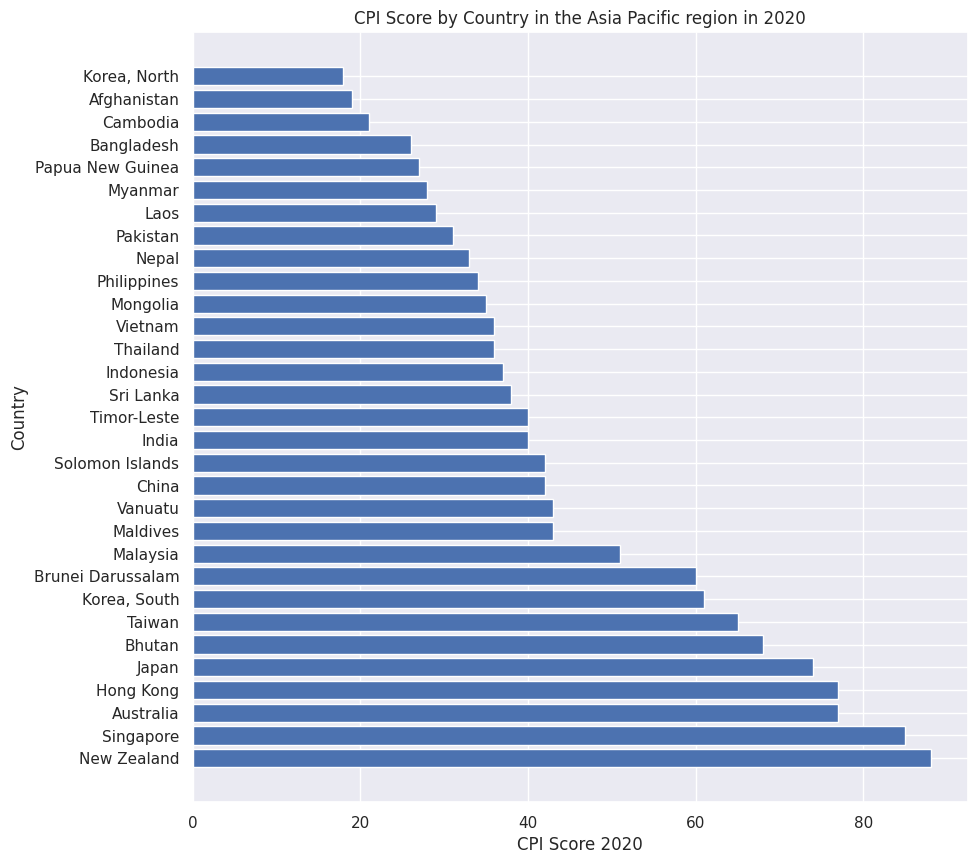

In [71]:
#looking further into AP since they have large ranges I want to see where each country within the region is at

AP = df[df['Region'] == 'AP']
plt.figure(figsize= (10,10))
plt.barh(AP['Country'],AP['CPI score 2020'])
plt.ylabel('Country')
plt.xlabel('CPI Score 2020')
plt.title('CPI Score by Country in the Asia Pacific region in 2020')

Text(0.5, 1.0, 'CPI Score by Country in the Asia Pacific region in 2012')

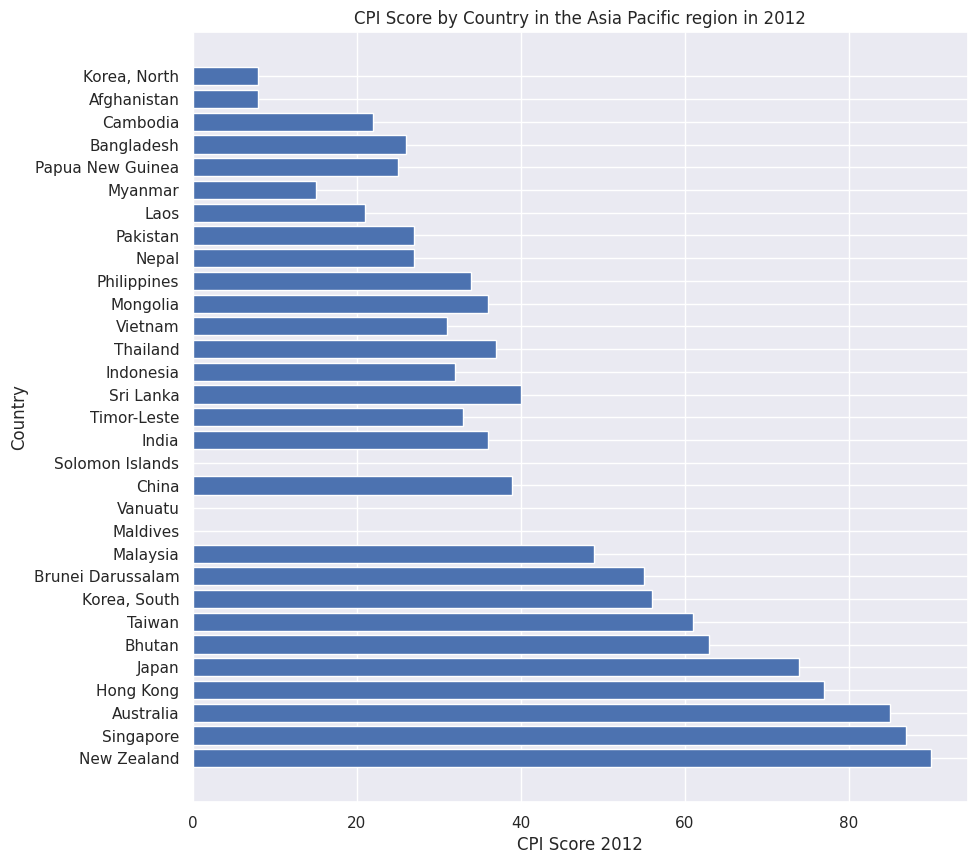

In [72]:
#Doing the bar graph again but this time for the 2012 year, again comparing the two years (2020 and 2012)
AP = df[df['Region'] == 'AP']
plt.figure(figsize= (10,10))
plt.barh(AP['Country'],AP['CPI Score 2012'])
plt.ylabel('Country')
plt.xlabel('CPI Score 2012')
plt.title('CPI Score by Country in the Asia Pacific region in 2012')

Text(0.5, 0, 'CPI Score 2020')

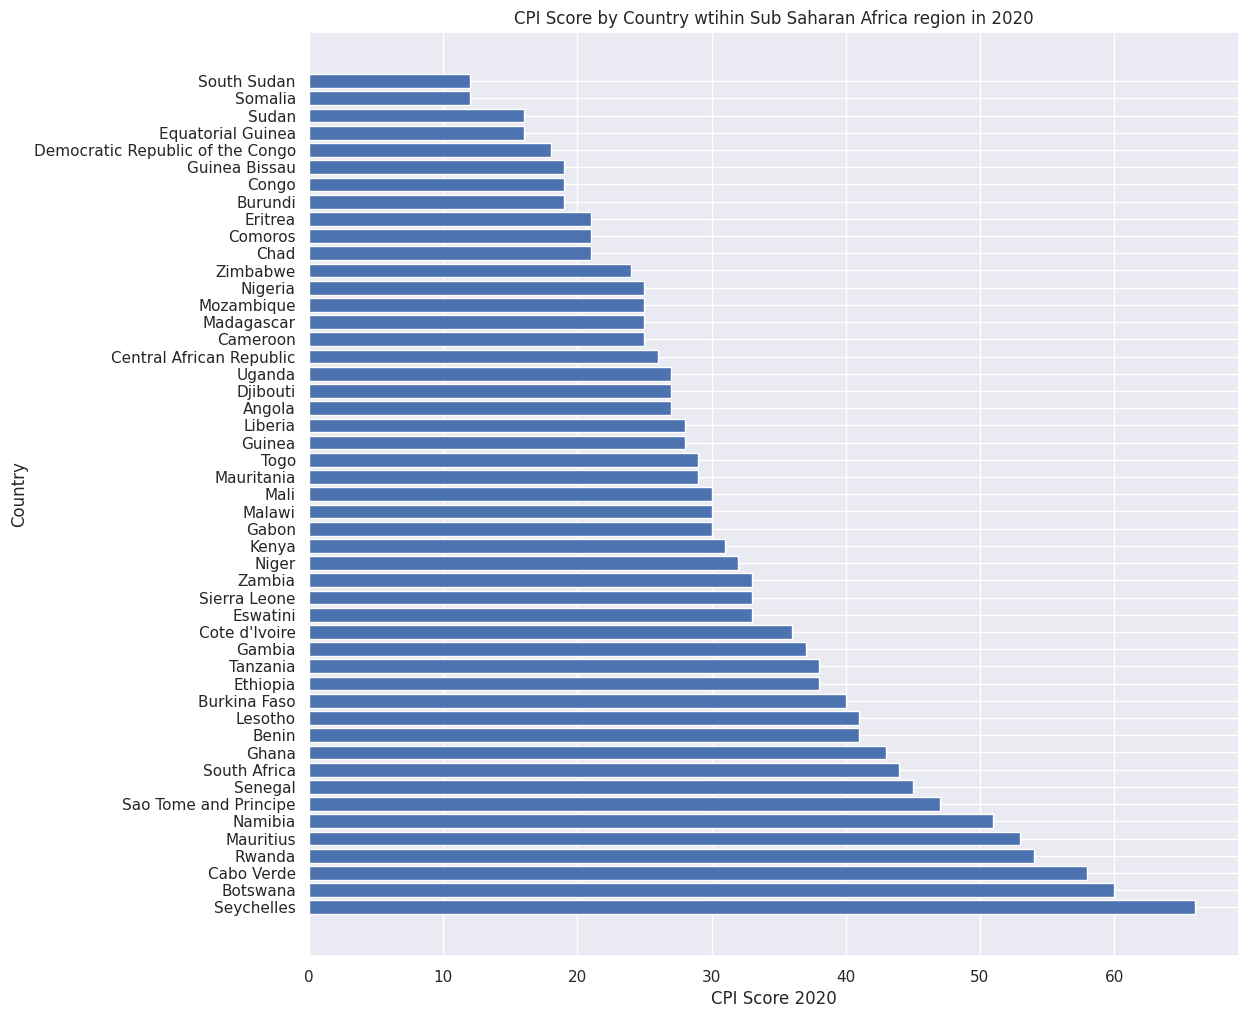

In [73]:
#We can also look at SSA since they have four outliers in 2012 but only one in 2020
#Once again doing a bar graph to see the country and the corresponding CPI score
SSA = df[df['Region'] == 'SSA']
plt.figure(figsize= (12,12))
plt.barh(SSA['Country'],SSA['CPI score 2020'])
plt.title('CPI Score by Country wtihin Sub Saharan Africa region in 2020')
plt.ylabel('Country')
plt.xlabel('CPI Score 2020')


Text(0.5, 1.0, 'CPI Score by Country wtihin Sub Saharan Africa region in 2012')

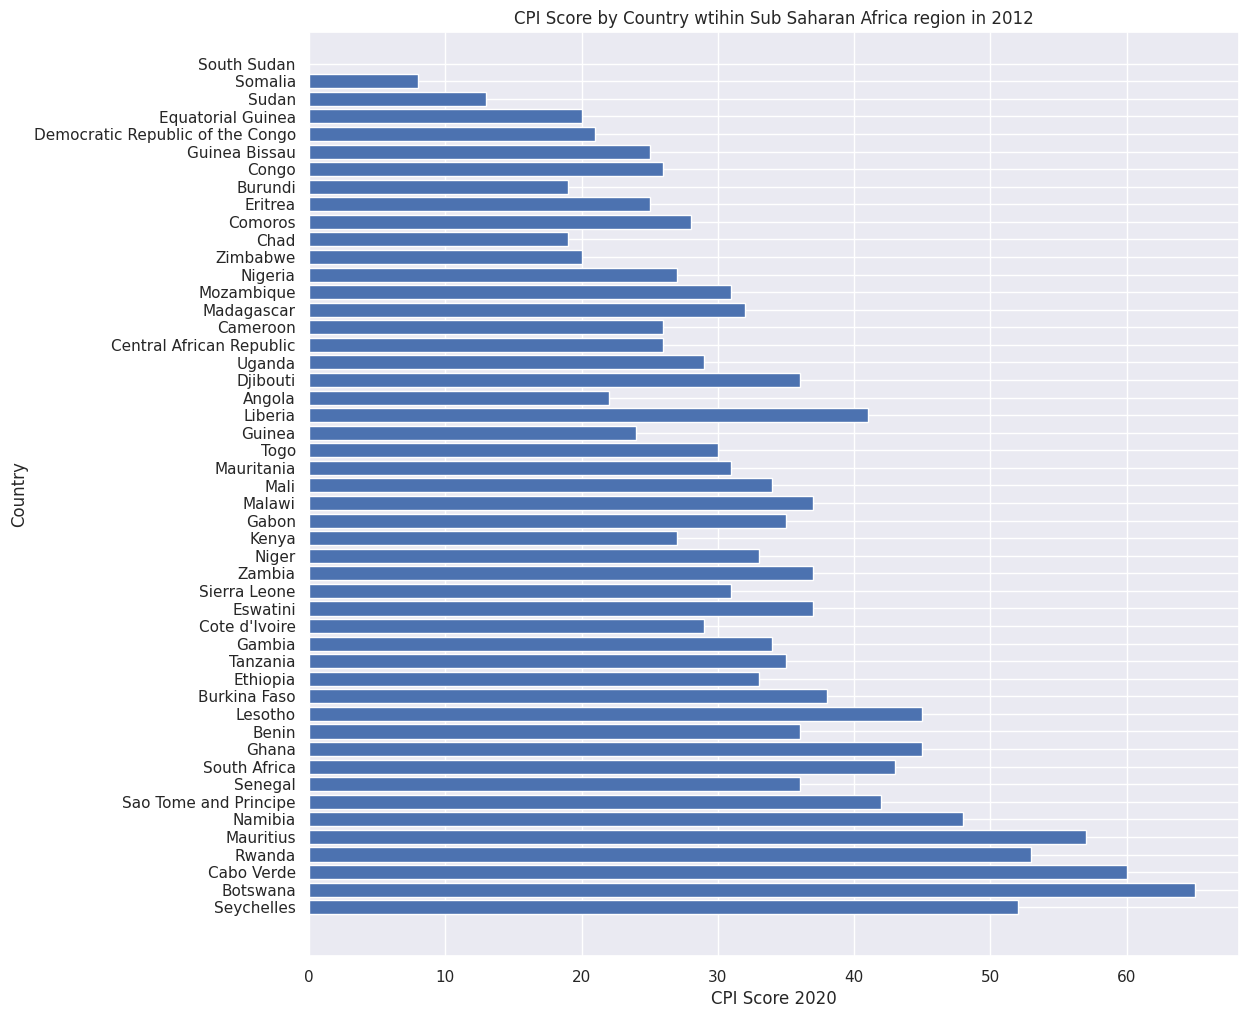

In [74]:
plt.figure(figsize= (12,12))
plt.barh(SSA['Country'],SSA['CPI Score 2012'])
plt.ylabel('Country')
plt.xlabel('CPI Score 2020')
plt.title('CPI Score by Country wtihin Sub Saharan Africa region in 2012')
# we can see that in 2012 Somalia was below a CPI score of 10 while in 2020 Somalia has surpassed a score of 10

# A conclusion summarizing the key findings from your analysis and any recommendations or hypotheses for further research.

It would seem that regions that had a wide range and regions that had outliers in their CPI scores throughout their years have started to show a trend where they increased their CPI socres. I think this would call for a further research as to any links between CPI scores and other variables. Things that come to my mind would be economic growth, human rights, and political change.